In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

from skimage.metrics import structural_similarity as ssim

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense ,Conv2D,MaxPooling2D ,Dropout
from tensorflow.keras.layers import Conv2DTranspose, UpSampling2D, add
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import img_to_array

from keras import layers

from skimage.metrics import structural_similarity as ssim

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2023-08-25 15:38:23.442638: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-25 15:38:23.456422: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-25 15:38:23.587617: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-25 15:38:23.588773: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To ena

In [ ]:
SIZE=800

In [ ]:
dataset=os.listdir('dataset/processed')
np.random.shuffle(dataset)
train_set=dataset[0:512]
test_set=dataset[512:]

In [ ]:
path='dataset/processed/'

train_hr=[]
for img_path in tqdm(train_set):
    img=cv2.imread(path+img_path)
    img=img.astype('float32')/255
    train_hr.append(img)
train_hr=np.array(train_hr)

train_lr=[]
for img_path in tqdm(train_set):
    img=cv2.imread(path+img_path)
    img=cv2.resize(img,(100,100))
    img=cv2.resize(img,(SIZE,SIZE))
    img=img.astype('float32')/255
    train_lr.append(img)
train_lr=np.array(train_lr)

test_hr=[]
for img_path in tqdm(test_set):
    img=cv2.imread(path+img_path)
    img=img.astype('float32')/255
    test_hr.append(img)
test_hr=np.array(test_hr)

test_lr=[]
for img_path in tqdm(test_set):
    img=cv2.imread(path+img_path)
    img=cv2.resize(img,(100,100))
    img=cv2.resize(img,(SIZE,SIZE))
    img=img.astype('float32')/255
    test_lr.append(img)
test_lr=np.array(test_lr)

100%|████████████████████████████████████████| 128/128 [00:00<00:00, 266.83it/s]


0.78002197


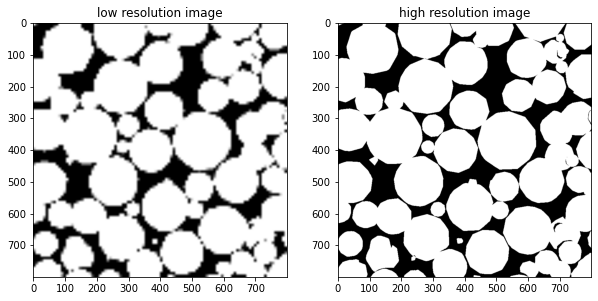

In [ ]:
i=np.random.randint(0,512)

img,target=train_lr[i],train_hr[i]

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
ax1.imshow(img)
ax1.set_title('low resolution image')
ax2.imshow(target)
ax2.set_title('high resolution image')

print(ssim(img,target, channel_axis = -1, data_range = 1))

In [ ]:
input=Input(shape=(SIZE,SIZE,3))
x=tf.keras.layers.Conv2D(64,9,padding='same',activation='relu') (input)
x=tf.keras.layers.Conv2D(32,3,padding='same',activation='relu') (x)
output=tf.keras.layers.Conv2D(3,5,padding='same',activation='relu') (x)

model=Model(input,output)

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='mean_squared_error')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 800, 800, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 800, 800, 64)      15616     
                                                                 
 conv2d_1 (Conv2D)           (None, 800, 800, 32)      18464     
                                                                 
 conv2d_2 (Conv2D)           (None, 800, 800, 3)       2403      
                                                                 
Total params: 36483 (142.51 KB)
Trainable params: 36483 (142.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(train_lr,train_hr,epochs=20,batch_size=1,validation_split = 0.2)

Epoch 1/20
409/409 [==============================] - 92s 225ms/step - loss: 0.0333 - val_loss: 0.0179
Epoch 2/20
409/409 [==============================] - 91s 223ms/step - loss: 0.0176 - val_loss: 0.0180
Epoch 3/20
409/409 [==============================] - 91s 223ms/step - loss: 0.0172 - val_loss: 0.0170
Epoch 4/20
409/409 [==============================] - 91s 223ms/step - loss: 0.0171 - val_loss: 0.0170
Epoch 5/20
409/409 [==============================] - 91s 222ms/step - loss: 0.0169 - val_loss: 0.0169
Epoch 6/20
409/409 [==============================] - 91s 223ms/step - loss: 0.0168 - val_loss: 0.0167
Epoch 7/20
409/409 [==============================] - 91s 223ms/step - loss: 0.0167 - val_loss: 0.0168
Epoch 8/20
409/409 [==============================] - 91s 223ms/step - loss: 0.0167 - val_loss: 0.0169
Epoch 9/20
409/409 [==============================] - 91s 222ms/step - loss: 0.0166 - val_loss: 0.0164
Epoch 10/20
409/409 [==============================] - 91s 223ms/step - l

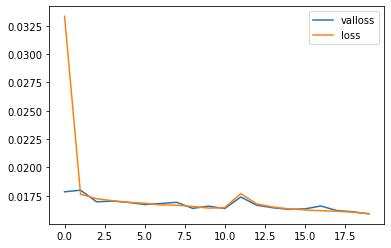

In [ ]:
plt.plot(history.history['val_loss'], label ='valloss')
plt.plot(history.history['loss'], label ='loss')
plt.legend()

In [ ]:
model.save('models/base_model_800.h5')

/home/lcadame/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
def mse(img,target):
    mse=np.mean((img-target)**2)
    return mse

In [ ]:
def psnr(img,target):
    psnr=10*np.log10(1/mse(img,target))
    return psnr

In [ ]:
model_path = 'models/base_model_800.h5'

model=tf.keras.models.load_model(model_path)

In [ ]:
def evaluate_model(test_hr,test_lr,model):

    i=np.random.randint(0,len(test_hr))

    img,target=test_lr[i],test_hr[i]
    output=model.predict(img.reshape(1,SIZE,SIZE,3))[0]

    fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,15))
    ax1.imshow(img)
    ax1.set_title('low resolution image')
    ax2.imshow(output)
    ax2.set_title('model output')
    ax3.imshow(target)
    ax3.set_title('high resolution image')

    print('')
    print('SSIM between LR image and HR image: {}'.format(ssim(img,target,channel_axis=-1, data_range = 1)))
    print('SSIM between model output and HR image: {}'.format(ssim(output,target,channel_axis=-1, data_range = 1)))
    print('')
    print('MSE between LR image and HR image: {}'.format(mse(img,target)))
    print('MSE between model output and HR image: {}'.format(mse(output,target)))
    print('')
    #print('PSNR between LR image and HR image: {}'.format(psnr(img,target)))
    #print('PSNR between model output and HR image: {}'.format(psnr(output,target)))

    return img,output,target

1/1 [==============================] - 0s 94ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



SSIM between LR image and HR image: 0.7650496363639832
SSIM between model output and HR image: 0.8597748875617981

MSE between LR image and HR image: 0.02431761659681797
MSE between model output and HR image: 0.016810061410069466



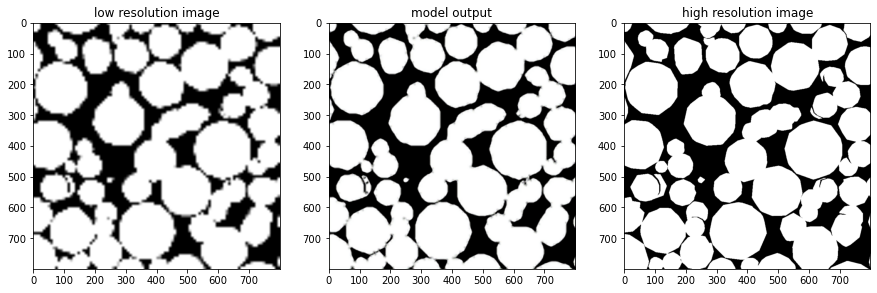

In [ ]:
img,output,target=evaluate_model(test_hr,test_lr,model)